In [1]:
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')


In [2]:
import importlib
import os
from geom3d.dev_scripts import run_training

importlib.reload(run_training)

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
%run /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name 'DimeNetPlusPlus' --num_molecules 80000 --max_epochs 100 --split 'fragment_scaffold' --target_name 'ES1' --test_set_fragment_cluster 6 --lr_scheduler 'CosineAnnealingWarmRestarts' --batch_size '16' 


config saved to /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/DimeNetPlusPlus_opt_ES1_80000
config saved at  /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/DimeNetPlusPlus_opt_ES1_80000
config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/DimeNetPlusPlus_opt_ES1_80000
/rds/general/user/cb1319/home/GEOM3D/Geom3D/datasets/80000dataset_ES1.pt
Model loaded:  DimeNetPlusPlus
fragment_scaffold split
clustering done with metric: rogerstanimoto
Index(['InChIKey', 'Morgan_Fingerprint'], dtype='object')
Clustering dataset with threshold 0.067
Number of clusters: 10
Number of molecules in each cluster for morgan fp: {1: 99, 2: 51, 3: 7, 4: 29, 5: 27, 6: 3, 7: 60, 8: 19, 9: 8, 10: 7}
Number of molecules in each cluster after merging small clusters: {1: 99, 2: 51, 3: 36, 4: 30, 5: 60, 6: 34}
Chosen cluster: 6
Number of molecules in the cluster: 34


analysing how many oliogomers have chosen fragments: 100%|██████████| 34/34 [00:01<00:00, 18.51it/s]


Number of Oligomers that have a fragment in the cluster: 40684
size of cluster_keys: 40684


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Dataset split indices saved to /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/datasplit_80000_fragment_scaffold_threshold_0.067_cluster_6.npz
train_idx:  [45867, 50423, 63415, 28003, 58096, 49834, 51220, 28080, 3621, 24669, 46023, 76615, 49029, 37233, 21772, 25563, 12341, 61626, 53249, 68379, 21256, 3242, 3047, 31288, 15301, 30366, 42910, 75294, 35746, 38542, 13003, 2511, 8115, 27347, 42566, 10681, 1556, 430, 61823, 41721, 50463, 3740, 4367, 29256, 21321, 57772, 63932, 58276, 1170, 26346, 38119, 72183, 76234, 73581, 51792, 20133, 16525, 14911, 74486, 45469, 45605, 40692, 61434, 69598, 9295, 39819, 62036, 39999, 65509, 64160, 52050, 1938, 34021, 2675, 3536, 3723, 33134, 13850, 77107, 4677, 24715, 54611, 30310, 32163, 47333, 5169, 62824, 47702, 24835, 11757, 42688, 75185, 51250, 35249, 65762, 46191, 29880, 15921, 63883, 51959, 37951, 73122, 16406, 6789, 72953, 36414, 41208, 49421, 28415, 42297, 78870, 19232, 27202, 48681, 66312, 71250, 51643, 29101, 63508, 75973, 35668, 

wandb: Currently logged in as: cyprienbone. Use `wandb login --relogin` to force relogin


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/fabric/connector.py:565: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..


Mixed precision training is activated.


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoint directory /rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment/DimeNetPlusPlus_opt_ES1_80000 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_repr | DimeNetPlusPlus | 288 K 
-----------------------------------------------------
288 K     Trainable params
6         Non-trainable params
288 K     Total params
1.154     Total estimated model params size (MB)


Apply lr scheduler CosineAnnealingWarmRestarts


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Learning Rate for Epoch 0: 5.00000e-04


In [4]:
import wandb

wandb.finish()

In [3]:
import optuna
import os

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
optuna.delete_study(study_name="", storage="sqlite:///./hp_search/my_study.db")

In [3]:
%matplotlib inline

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt
Model loaded:  SchNet
y_true tensor(6.1075)
tensor(6.1075)
oligomer_scaffold split


Calculating the average PCA score for each oligomer: 100%|██████████| 82204/82204 [00:18<00:00, 4391.58it/s]


Problematic keys: []
Number of Oligomers not converted: 0
Clustering with min_cluster_size = 750 and min_samples = 50
Length of Cluster 4: 10334
train_idx:  [70102, 77019, 76912, 7581, 24952, 16321, 15284, 64546, 49666, 53735, 70602, 33456, 73439, 33479, 55798, 19556, 64988, 78315, 72577, 15840, 9974, 41157, 21563, 5263, 20439, 10647, 61024, 69961, 10559, 22434, 68022, 73209, 34686, 63636, 74484, 33635, 44897, 20485, 18939, 36257, 52254, 44401, 40353, 70017, 67781, 53605, 35749, 48331, 29938, 34193, 51464, 20171, 47997, 78026, 25458, 64213, 7999, 33233, 39115, 5302, 17528, 14435, 55265, 42840, 78751, 27652, 7339, 44190, 43217, 4870, 3838, 66770, 14020, 70896, 25184, 57853, 13350, 13135, 13683, 33930, 23526, 5472, 53091, 2156, 10612, 27176, 3194, 42666, 29522, 21005, 44455, 30990, 7311, 46151, 50477, 45379, 67413, 46623, 44668, 56423, 70401, 8413, 4851, 5496, 68001, 73365, 6344, 12924, 50673, 63198, 43646, 21998, 33865, 26771, 5760, 10516, 30957, 16295, 69009, 65526, 43936, 39632, 59802

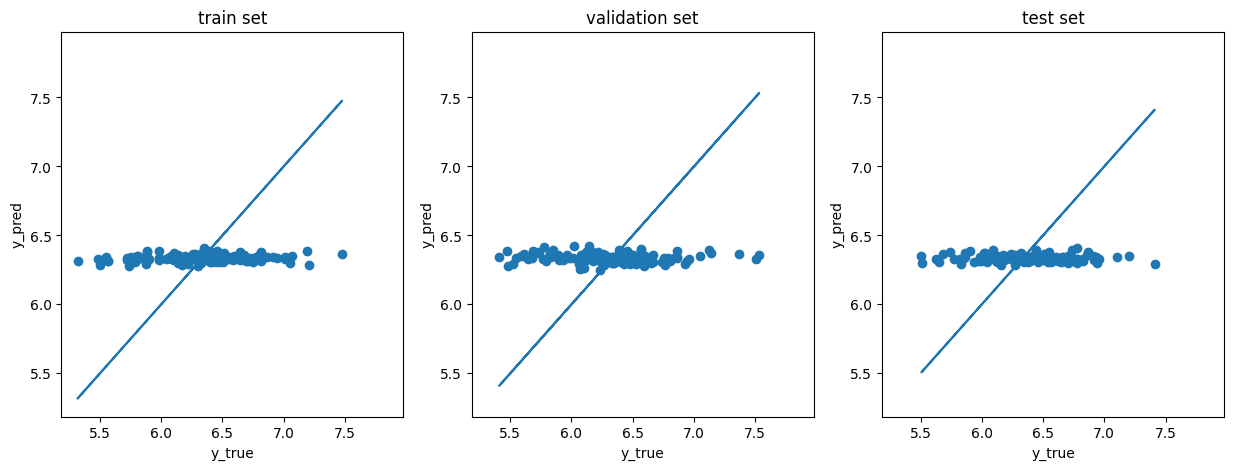

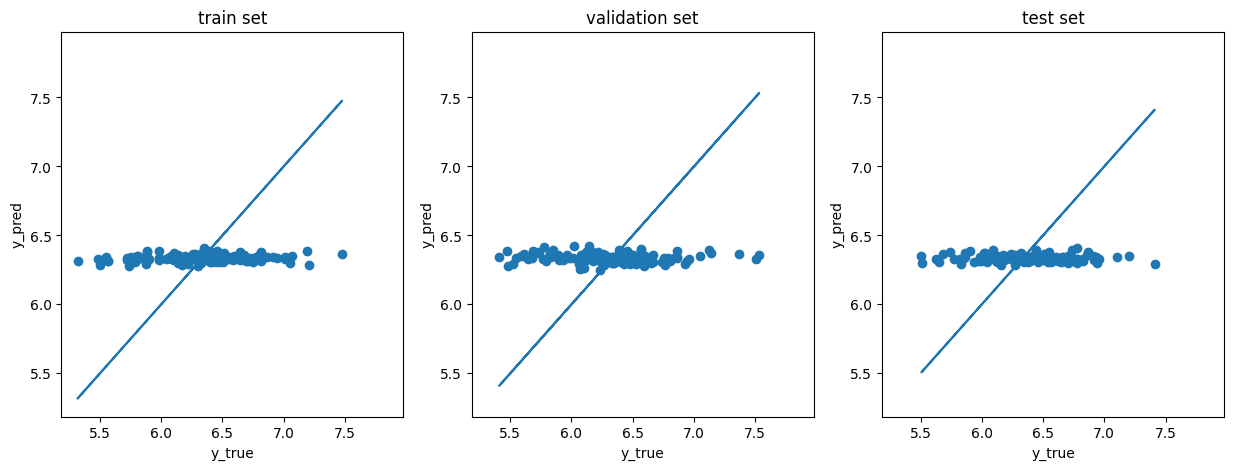

Mean Absolute Error (MAE) on test_set: 0.31643385
Root Mean Squared Error (RMSE) on test_set: 0.406899428300838


(<torch_geometric.loader.dataloader.DataLoader at 0x146298991210>,
 0.31643385,
 0.406899428300838)

<Figure size 640x480 with 0 Axes>

In [4]:
import importlib
from geom3d.inference_tests import inference_test_models

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

importlib.reload(inference_test_models)
inference_test_models.plot_training_results(chkpt_path, config_dir)

In [6]:
import os
import torch
import copy
from geom3d import train_models
from geom3d.train_models import SchNet, DimeNet, DimeNetPlusPlus, GemNet, SphereNet, SphereNetPeriodic, PaiNN, Pymodel
from geom3d.train_models import read_config, load_data, train_val_test_split, model_setup
import importlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

"""
Function to plot the training results
"""
import numpy as np
config = read_config(config_dir)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])
torch.manual_seed(config["seed"])

config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"

print('checkpoint used:', chkpt_path)

# try:
#     pymodel = Pymodel.load_from_checkpoint(chkpt_path)
#     pymodel.freeze()
# except (TypeError, KeyError):

# to get the try and except start indent here
checkpoint = torch.load(chkpt_path)

model, graph_pred_linear = model_setup(config)
print("Model loaded: ", config["model_name"])

# Pass the model and graph_pred_linear to the Pymodel constructor
pymodel = Pymodel(model, graph_pred_linear, config)

# Load the state dictionary
pymodel.load_state_dict(state_dict=checkpoint['state_dict'])

# Set the model to evaluation mode
pymodel.eval()

# end indent here
dataset = load_data(config)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])

print('y_true', dataset[0].y)

# removed here because these bade the code error
# pymodel_cpu = copy.deepcopy(pymodel).to('cpu')
print(dataset[0].to('cpu').y)
# print('y_pred_cpu', pymodel_cpu(dataset[0].to('cpu')))

# Move pymodel to the same device as the input data
pymodel = pymodel.to(config["device"])

# removed code here because it made the code error
# print('y_pred', pymodel(dataset[0].to(config["device"])))

train_loader, val_loader, test_loader = train_val_test_split(
    dataset, config=config, batch_size=config["batch_size"]
)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt
Model loaded:  SchNet
y_true tensor(6.1075)
tensor(6.1075)
oligomer_scaffold split


Calculating the average PCA score for each oligomer: 100%|██████████| 82204/82204 [00:18<00:00, 4380.69it/s]


Problematic keys: []
Number of Oligomers not converted: 0
Clustering with min_cluster_size = 750 and min_samples = 50
Length of Cluster 4: 10334
train_idx:  [70102, 77019, 76912, 7581, 24952, 16321, 15284, 64546, 49666, 53735, 70602, 33456, 73439, 33479, 55798, 19556, 64988, 78315, 72577, 15840, 9974, 41157, 21563, 5263, 20439, 10647, 61024, 69961, 10559, 22434, 68022, 73209, 34686, 63636, 74484, 33635, 44897, 20485, 18939, 36257, 52254, 44401, 40353, 70017, 67781, 53605, 35749, 48331, 29938, 34193, 51464, 20171, 47997, 78026, 25458, 64213, 7999, 33233, 39115, 5302, 17528, 14435, 55265, 42840, 78751, 27652, 7339, 44190, 43217, 4870, 3838, 66770, 14020, 70896, 25184, 57853, 13350, 13135, 13683, 33930, 23526, 5472, 53091, 2156, 10612, 27176, 3194, 42666, 29522, 21005, 44455, 30990, 7311, 46151, 50477, 45379, 67413, 46623, 44668, 56423, 70401, 8413, 4851, 5496, 68001, 73365, 6344, 12924, 50673, 63198, 43646, 21998, 33865, 26771, 5760, 10516, 30957, 16295, 69009, 65526, 43936, 39632, 59802

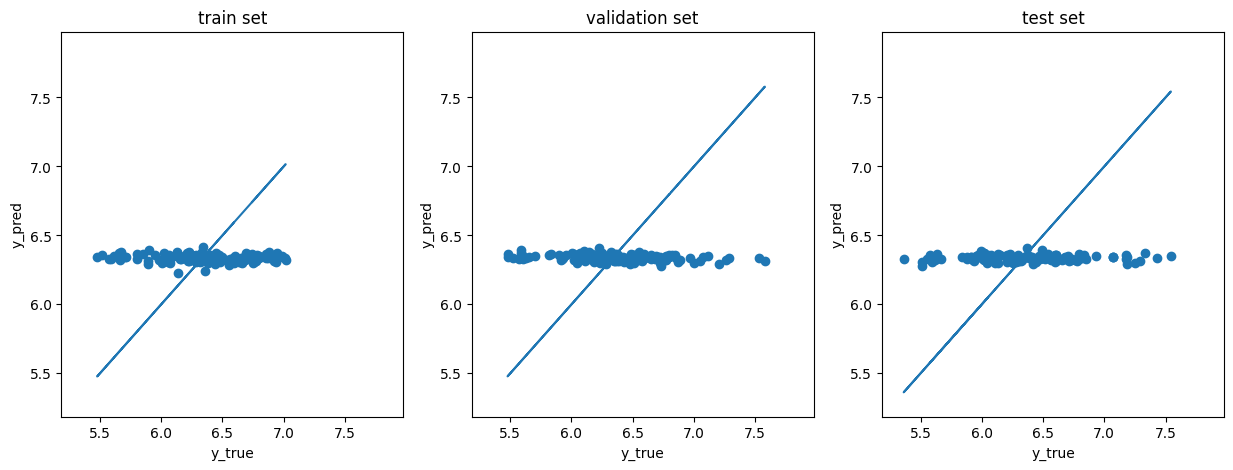

Mean Absolute Error (MAE) on test_set: 0.3179887
Root Mean Squared Error (RMSE) on test_set: 0.40672586154179413


<Figure size 640x480 with 0 Axes>

In [8]:
# Get the y values from the dataset for setting plot axes
y_values = [data.y for data in dataset]
y_min = min(y_values)
y_max = max(y_values)

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
for id, loader in enumerate([train_loader, val_loader, test_loader]):
    axis[id].set_ylabel('y_pred')
    axis[id].set_xlabel('y_true')
    axis[id].set_xlim(y_min, y_max)  # Set x-axis limits based on min and max y values
    axis[id].set_ylim(y_min, y_max)  # Set y-axis limits based on min and max y values

    for x in loader:
        with torch.no_grad():
            Y_pred = pymodel(x.to(config["device"]))
        break
    axis[id].scatter(x.y.to('cpu'), Y_pred.to('cpu').detach())
    axis[id].plot(x.y.to('cpu'), x.y.to('cpu'))
    axis[id].set_title(['train set', 'validation set', 'test set'][id])
plt.show()
plt.savefig('training_results.png')

# calculate the mean absolute error
y_true = []
y_pred = []
for x in test_loader:
    with torch.no_grad():
        Y_pred = pymodel(x.to(config["device"]))
    y_true.append(x.y.to('cpu'))
    y_pred.append(Y_pred.to('cpu').detach())
y_true = torch.cat(y_true)
y_pred = torch.cat(y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error (MAE) on test_set:', mae)

# calculate the root mean squared error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE) on test_set:', rmse)

In [2]:
import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/hpc_script_fragment_exp/'

model_name = ['SchNet', 'PaiNN', 'SphereNet', 'DimeNet', 'Equiformer', 'DimeNetPlusPlus']
cluster = ['1', '2', '3', '4', '5', '6']
target_name = 'IP'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

for i in range(len(model_name)):
    for j in range(len(cluster)):
        # set the batch size and learning rate scheduler
        if model_name[i] == 'SphereNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '4'
        elif model_name[i] == 'PaiNN':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '16'
        elif model_name[i] == 'SchNet':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'
        elif model_name[i] == 'DimeNet':
            lr_scheduler = 'CosineAnnealingLR'
            batch_size = '20'
        elif model_name[i] == 'Equiformer':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '20'
        elif model_name[i] == 'DimeNetPlusPlus':
            lr_scheduler = 'CosineAnnealingWarmRestarts'
            batch_size = '16'


        # Specify the script content
        script = "#!/bin/bash \n"+\
            "#PBS -l walltime=72:00:00 \n"+\
            "#PBS -l select=1:ncpus=4:mem=100gb:ngpus=1:gpu_type=RTX6000 \n"+\
            f"#PBS -N {model_name[i]}_opt_cluster_{cluster[j]}_{target_name} \n"+\
            " \n"+\
            "cd /rds/general/user/cb1319/home/GEOM3D/Geom3D/ \n"+\
            " \n"+\
            "module load anaconda3/personal \n"+ \
            "module load tools/prod  \n"+ \
            "module load Python/3.11.3-GCCcore-12.3.0  \n"+ \
            " \n"+\
            "source activate Geom3D     \n"+\
            f"python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/dev_scripts/run_training.py --model_name '{str(model_name[i])}' --num_molecules 80000 --max_epochs 100 --split 'fragment_scaffold' --target_name '{str(target_name)}' --test_set_fragment_cluster {cluster[j]} --lr_scheduler '{str(lr_scheduler)}' --batch_size '{str(batch_size)}' \n"

        # Save the script to a file
        file_path = os.path.join(directory_path, f'{model_name[i]}_opt_cluster_{cluster[j]}_{target_name}.sh')
        with open(file_path, 'wb') as f:
            f.write( bytes(script, 'utf-8') )

        print(f"Script saved to: {file_path}")

        if i == len(model_name)-1 and j == len(cluster)-1:
            print(script)
    # !qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/hpc_script_datasize_study/{model_name}_opt_{num_mols[i]}.sh
    # !qstat

Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_1_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_2_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_3_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_4_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_5_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/SchNet_opt_cluster_6_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/PaiNN_opt_cluster_1_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/PaiNN_opt_cluster_2_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/PaiNN_opt_cluster_3_IP.sh
Script saved to: /rds/general/user/cb1319/home/hpc_script_fragment_exp/PaiNN_opt_cluster_4_IP.sh
Script saved to: /rds/ge

In [3]:
model_name = ['DimeNet', 'Equiformer', 'DimeNetPlusPlus']
cluster = ['1', '2', '3', '4', '5', '6']
target_name = 'IP'

for i in range(len(model_name)):
    for j in range(len(cluster)):
        !qsub -e ./hpc_script_fragment_exp/cache -o ./hpc_script_fragment_exp/cache /rds/general/user/cb1319/home/hpc_script_fragment_exp/{model_name[i]}_opt_cluster_{cluster[j]}_{target_name}.sh

!qstat

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


In [ ]:
import torch
from torch_geometric.loader import DataLoader

# Load the original dataset
original_dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius.pt"
original_dataset = torch.load(original_dataset_path)

# Load the new datasets
new_dataset_paths = [
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_IP.pt",
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_ES1.pt",
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_fosc1.pt",
]

new_datasets = [torch.load(path) for path in new_dataset_paths]

# Print the first few samples of each dataset
num_samples_to_display = 3

# Original dataset
print("Original Dataset:")
for i, data in enumerate(original_dataset[:num_samples_to_display]):
    print(f"Sample {i + 1} - Target: {data.y.item()}")

# New datasets
for j, new_dataset in enumerate(new_datasets):
    print(f"\nNew Dataset {j + 1}:")
    for i, data in enumerate(new_dataset[:num_samples_to_display]):
        print(f"Sample {i + 1} - Target: {data.y.item()}")


In [ ]:
%run /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/utils/update_target.py